# Machine Learning Model Tsunami Prediction Based on Earthquake Dataset

### Tsunami Prediction using Ensemble Machine Learning Algorithm I Used 4 Stack Algorithm Below : 

1. Gradient Boosting 
2. Random Forest 
3. Decision Tree 
4. Support Vector Machine (SVM) 

### The Goal of This Project Is To Train The Machine About Tsunami Indications From Earthquakes. This goal, if the machine functions well, will be able to help humans audit earthquake data and carry out mitigation early before a disaster occurs.

## Preparation Step

In [1]:
# Because Folium Library is Add Ons modul we need to Install it first
! pip install folium

## Import Library and Data Preparation

In [2]:
# Import all library We Need
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
import seaborn as sns

In [3]:
# Import Dataset i use Kaggle Dataset and already upload it into my github repository 
url = 'https://raw.githubusercontent.com/RyZal25/project-capstone/main/Worldwide-Earthquake-database.csv'
data = pd.read_csv(url, encoding="UTF-8")

In [4]:
# Analyze the feature of dataset 
data.columns

Index(['I_D', 'FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE',
       'SECOND', 'FOCAL_DEPTH', 'EQ_PRIMARY', 'EQ_MAG_MW', 'EQ_MAG_MS',
       'EQ_MAG_MB', 'EQ_MAG_ML', 'EQ_MAG_MFA', 'EQ_MAG_UNK', 'INTENSITY',
       'COUNTRY', 'STATE', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE',
       'REGION_CODE', 'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING',
       'MISSING_DESCRIPTION', 'INJURIES', 'INJURIES_DESCRIPTION',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED',
       'HOUSES_DAMAGED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_HOUSES_DAMAGED',
       'TOTAL_HOUSES_DAMAGED_DESCRIPTION'],
      dtype='object')

In [5]:
# Show The Preview of Dataset 
data.head

<bound method NDFrame.head of         I_D FLAG_TSUNAMI  YEAR  MONTH   DAY  HOUR  MINUTE SECOND  FOCAL_DEPTH  \
0         1           No -2150    NaN   NaN   NaN     NaN                 NaN   
1         2          Yes -2000    NaN   NaN   NaN     NaN    NaN          NaN   
2         3           No -2000    NaN   NaN   NaN     NaN    NaN         18.0   
3      5877          Yes -1610    NaN   NaN   NaN     NaN    NaN          NaN   
4         8           No -1566    NaN   NaN   NaN     NaN                 NaN   
...     ...          ...   ...    ...   ...   ...     ...    ...          ...   
6188  10488           No  2020    4.0   1.0  12.0    23.0     27         10.0   
6189  10490          Yes  2020    5.0   2.0  12.0    51.0      6         17.0   
6190  10491           No  2020    5.0   7.0  20.0    18.0     22         10.0   
6191  10494           No  2020    5.0  18.0  13.0    48.0      3         10.0   
6192  10501          Yes  2020    5.0  29.0   5.0    30.0    NaN          NaN  

## Preprocessing Data

### Feature Engineering

In [6]:
# Select Columns Data We Need for
selected_features = [
    'COUNTRY', 'REGION_CODE', 'LATITUDE', 'LONGITUDE',
    'MONTH', 'DAY', 'FOCAL_DEPTH', 'EQ_PRIMARY', 'FLAG_TSUNAMI'
    ]
data = data[selected_features]

In [7]:
# Preview The New DataFrame we have now
data.head()

,COUNTRY,REGION_CODE,LATITUDE,LONGITUDE,MONTH,DAY,FOCAL_DEPTH,EQ_PRIMARY,FLAG_TSUNAMI
0,JORDAN,140.0,31.1,35.5,NaN,NaN,NaN,7.3,No
1,SYRIA,130.0,35.683,35.8,NaN,NaN,NaN,NaN,Yes
2,TURKMENISTAN,40.0,38,58.2,NaN,NaN,18.0,7.1,No
3,GREECE,130.0,36.4,25.4,NaN,NaN,NaN,NaN,Yes
4,ISRAEL,140.0,31.5,35.3,NaN,NaN,NaN,NaN,No


### Cleaning Data

In [8]:
# Pairwise deletion for Deleting Missing Values
data = data.dropna()

# Short and Show row contains <whitespace>
rows_with_whitespace = data[data['LATITUDE'].str.strip() == '']
print(rows_with_whitespace)

        COUNTRY  REGION_CODE LATITUDE LONGITUDE  MONTH   DAY  FOCAL_DEPTH  \
3277  INDONESIA         60.0              98.25   12.0  28.0         33.0   
3362  INDONESIA        170.0                123   12.0  21.0        150.0   
3403  INDONESIA        170.0                124    5.0  28.0        120.0   

      EQ_PRIMARY FLAG_TSUNAMI  
3277         7.9          Yes  
3362         8.0          Yes  
3403         7.5           No  


In [9]:
# Cleaning data that contains <whitespace> from new DataFrame
data = data.drop(rows_with_whitespace.index)

In [10]:
# Factorization of text labeled columns (COUNTRY and FLAG_TSUNAMI)
label_encoder = LabelEncoder()
data['COUNTRY'] = data['COUNTRY'].astype('category').cat.codes
data['FLAG_TSUNAMI'] = data['FLAG_TSUNAMI'].astype('category').cat.codes

In [11]:
# Reseting Index after cleaning and normalization data
data.reset_index(drop=True, inplace=True)

In [12]:
# Show Cleaned Data To Confirm All CLEAR
data.head()

,COUNTRY,REGION_CODE,LATITUDE,LONGITUDE,MONTH,DAY,FOCAL_DEPTH,EQ_PRIMARY,FLAG_TSUNAMI
0,6,40.0,39.7,45.5,6.0,21.0,16.0,5.8,0
1,0,40.0,36.8,66.2,5.0,15.0,50.0,7.5,0
2,117,40.0,38,58.3,8.0,20.0,18.0,7.1,0
3,54,140.0,38.1,46.3,11.0,4.0,15.0,7.6,0
4,40,40.0,41.4,43.2,4.0,22.0,10.0,5.3,0


### Data Normalization

In [13]:
# Check DType data and confirm all numeric data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRY       3108 non-null   int16  
 1   REGION_CODE   3108 non-null   float64
 2   LATITUDE      3108 non-null   object 
 3   LONGITUDE     3108 non-null   object 
 4   MONTH         3108 non-null   float64
 5   DAY           3108 non-null   float64
 6   FOCAL_DEPTH   3108 non-null   float64
 7   EQ_PRIMARY    3108 non-null   float64
 8   FLAG_TSUNAMI  3108 non-null   int8   
dtypes: float64(5), int16(1), int8(1), object(2)
memory usage: 179.2+ KB


In [14]:
# Because there is non-numerical data in the data, it needs to be changed
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')

In [15]:
# Confirm All in The Right Condition
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRY       3108 non-null   int16  
 1   REGION_CODE   3108 non-null   float64
 2   LATITUDE      3108 non-null   float64
 3   LONGITUDE     3108 non-null   float64
 4   MONTH         3108 non-null   float64
 5   DAY           3108 non-null   float64
 6   FOCAL_DEPTH   3108 non-null   float64
 7   EQ_PRIMARY    3108 non-null   float64
 8   FLAG_TSUNAMI  3108 non-null   int8   
dtypes: float64(7), int16(1), int8(1)
memory usage: 179.2 KB


## Data Visualization

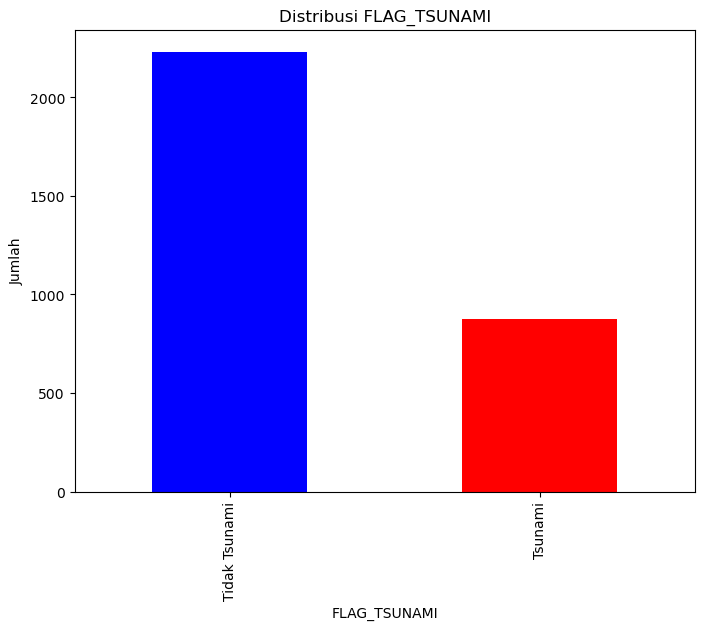

In [16]:
# FLAG_TSUNAMI distribution visualization to ensure data distribution
plt.figure(figsize=(8, 6))
data['FLAG_TSUNAMI'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribusi FLAG_TSUNAMI')
plt.xlabel('FLAG_TSUNAMI')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Tidak Tsunami', 'Tsunami'])
plt.show()

## Visualisasi Data Persebaran Gempa Berpotensi Tsunami

In [17]:
# Filter data only for earthquakes followed by tsunamis (FLAG_TSUNAMI == 1)
gempa_tsunami = data[data['FLAG_TSUNAMI'] == 1]

# Create an initial map and first condition view
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Loop through data on earthquakes followed by tsunamis and add markers to the map
for index, row in gempa_tsunami.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], tooltip=row['COUNTRY']).add_to(world_map)

# Displays the map in the notebook
world_map

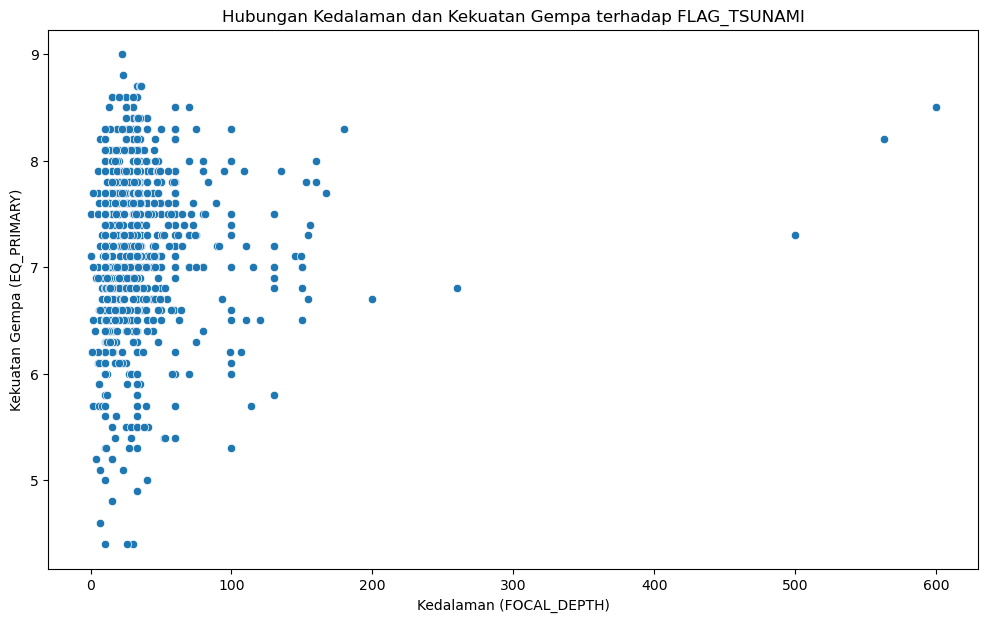

In [18]:
# Filter data only for earthquakes followed by tsunamis (FLAG_TSUNAMI == 1)
gempa_tsunami = data[data['FLAG_TSUNAMI'] == 1]

# Filter data based on earthquake depth and strength
gempa_filtered = gempa_tsunami[(gempa_tsunami['FOCAL_DEPTH'] >= 0) & (gempa_tsunami['FOCAL_DEPTH'] <= 600) &
                               (gempa_tsunami['EQ_PRIMARY'] >= 4) & (gempa_tsunami['EQ_PRIMARY'] <= 9)]

# Making scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x='FOCAL_DEPTH', y='EQ_PRIMARY', data=gempa_filtered)
plt.xlabel('Kedalaman (FOCAL_DEPTH)')
plt.ylabel('Kekuatan Gempa (EQ_PRIMARY)')
plt.title('Hubungan Kedalaman dan Kekuatan Gempa terhadap FLAG_TSUNAMI')
plt.show()

## Model Trainning 

### Split Data Train and Data Test

In [19]:
# Split the dataset into training data and test data
X = data.drop('FLAG_TSUNAMI', axis=1)
y = data['FLAG_TSUNAMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initializing Cross Validation

In [20]:
# Initialize KFold for cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store performance measurement results
accuracy_scores = []
confusion_matrices = []
classification_reports = []

### Initializing Ensemble Machine Learning Model

In [21]:
# Initialize the models that will be used in the ensemble
gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
random_forest_model = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Create a VotingClassifier ensemble
ensemble_classifier = VotingClassifier(estimators=[
    ('Gradient Boosting', gradient_boosting_model),
    ('Random Forest', random_forest_model),
    ('Decision Tree', decision_tree_model),
    ('SVM', svm_model)
], voting='soft')  # pemilihan 'hard' atau 'soft' voting

### Perform Cross Validation

In [22]:
# Doing cross validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Training an ensemble of models on training data (each fold)
    ensemble_classifier.fit(X_train_fold, y_train_fold)

    # Testing the model ensemble on validation data (each fold)
    y_val_pred = ensemble_classifier.predict(X_val_fold)

    # Measuring model performance on validation data
    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    confusion_matrix_fold = confusion_matrix(y_val_fold, y_val_pred)
    classification_report_fold = classification_report(y_val_fold, y_val_pred)

    accuracy_scores.append(accuracy_fold)
    confusion_matrices.append(confusion_matrix_fold)
    classification_reports.append(classification_report_fold)

    # Print training results per fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy_fold}")
    print(f"Lipatan {fold + 1} - Confusion Matrix:\n{confusion_matrix_fold}\n")
    print(f"Lipatan {fold + 1} - Classification Report:\n{classification_report_fold}")

Fold 1 - Accuracy: 0.8152610441767069
Lipatan 1 - Confusion Matrix:
[[165  24]
 [ 22  38]]

Lipatan 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       189
           1       0.61      0.63      0.62        60

    accuracy                           0.82       249
   macro avg       0.75      0.75      0.75       249
weighted avg       0.82      0.82      0.82       249

Fold 2 - Accuracy: 0.7991967871485943
Lipatan 2 - Confusion Matrix:
[[164  17]
 [ 33  35]]

Lipatan 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       181
           1       0.67      0.51      0.58        68

    accuracy                           0.80       249
   macro avg       0.75      0.71      0.73       249
weighted avg       0.79      0.80      0.79       249

Fold 3 - Accuracy: 0.8072289156626506
Lipatan 3 - Confusion Matrix:
[[161  18]
 [ 30  40]]



### Summarizing The Average Model Accuracy

In [23]:
# Calculates the average accuracy of 10 cross-validation folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy}")

Mean Accuracy: 0.821816297447856


## Train The Model on The Entire Training Data

In [24]:
# Train the model on all training data
ensemble_classifier.fit(X_train, y_train)

# Test the model on test data
y_test_pred = ensemble_classifier.predict(X_test)

# Measure model performance on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Print training results per fold
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Classification Report:\n{classification_report_test}")
print(f"Test Confusion Matrix:\n{confusion_matrix_test}")

Test Accuracy: 0.8038585209003215
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       439
           1       0.70      0.59      0.64       183

    accuracy                           0.80       622
   macro avg       0.77      0.74      0.75       622
weighted avg       0.80      0.80      0.80       622

Test Confusion Matrix:
[[392  47]
 [ 75 108]]
